In [2]:
import pandas as pd
import numpy as np
import nltk

# Twitter Data Scraping 

In [3]:
!pip install tweepy

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
mysql-connector-python 8.0.13 requires protobuf>=3.0.0, which is not installed.
You are using pip version 10.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
consumer_api= 'mxTTBeZ3GyqBmfi76RcjpOA0D'
consumer_secret= 'yF5Fi5YTNlosNKrP73TGb6KLT6xxVHaeKOYGQYjtj45BAO5pRI'
access_token= '775582536516849664-wOokh3u1KmZMndQiS9F2AQhBQ5Mvc3k'
access_secret= 'gwpsKLfyIIQk6GyaeNUbDAFvhpWQNjl0vlpO06i5HXqAh'

In [5]:
import tweepy


In [6]:
auth = tweepy.OAuthHandler(consumer_api, consumer_secret)
auth.set_access_token(access_token,access_secret)
api=tweepy.API(auth,wait_on_rate_limit=True)

In [7]:
tweets=api.user_timeline('narendramodi',count=100)
len(tweets)

100

In [8]:
tweets[0]

Status(_api=<tweepy.api.API object at 0x0000025FD5834C50>, _json={'created_at': 'Wed Feb 20 08:16:38 +0000 2019', 'id': 1098134316360511488, 'id_str': '1098134316360511488', 'text': 'Addressing the media after talks with HRH Mohammed Bin Salman, the Crown Prince of Saudi Arabia. https://t.co/H2tBemYuy7', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/H2tBemYuy7', 'expanded_url': 'https://www.pscp.tv/w/bz0EZTMyMjExNTJ8MU93eFdPa1BObnF4UdiuZNCegiQDzQTSYHYgZbbJ-XVLrnjmnzSw2t5Vbovp', 'display_url': 'pscp.tv/w/bz0EZTMyMjEx…', 'indices': [97, 120]}]}, 'source': '<a href="https://periscope.tv" rel="nofollow">Periscope</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 18839785, 'id_str': '18839785', 'name': 'Narendra Modi', 'screen_name': 'narendramodi', 'location': 'India', 'description': 'Prime 

In [9]:
df_tweets=pd.DataFrame()

for tweet in tweets:
    curr_tweet={
    'text':tweet.text,
    'created_at':tweet.created_at,
    'retweets':tweet.retweet_count,
    'likes':tweet.favorite_count,
    'source':tweet.source,
    'geo':tweet.geo,
    'profile_location':tweet.user.location,
    'profile_name':tweet.user.name,
    'profile_description':tweet.user.description}
    df_tweets=df_tweets.append(curr_tweet,ignore_index=True)
    

In [10]:
df_tweets

,created_at,geo,likes,profile_description,profile_location,profile_name,retweets,source,text
0,2019-02-20 08:16:38,None,10298.0,Prime Minister of India,India,Narendra Modi,3160.0,Periscope,Addressing the media after talks with HRH Moha...
1,2019-02-20 05:20:53,None,15310.0,Prime Minister of India,India,Narendra Modi,3519.0,Twitter Web Client,हिन्दी साहित्य के शिखर पुरुष नामवर सिंह जी के ...
2,2019-02-20 04:05:07,None,15879.0,Prime Minister of India,India,Narendra Modi,3804.0,Twitter for iPhone,Best wishes on Mizoram Statehood Day. \n\nThe ...
3,2019-02-20 04:04:10,None,12946.0,Prime Minister of India,India,Narendra Modi,3140.0,Twitter for iPhone,Greetings to the people of Arunachal Pradesh o...
4,2019-02-19 16:17:57,None,46932.0,Prime Minister of India,India,Narendra Modi,13150.0,Twitter for iPhone,India is delighted to welcome HRH Mohammed Bin...
5,2019-02-19 15:00:33,None,24791.0,Prime Minister of India,India,Narendra Modi,6177.0,Twitter Web Client,Memorable moments from the public meeting in V...
6,2019-02-19 14:58:07,None,22851.0,Prime Minister of India,India,Narendra Modi,6172.0,Twitter Media Studio,हमारी सरकार देश के विकास को दो पटरियों पर एक स...
7,2019-02-19 14:57:51,None,10508.0,Prime Minister of India,India,Narendra Modi,3667.0,Twitter Media Studio,Remarkable strides in the IT and health sector...
8,2019-02-19 14:56:58,None,12090.0,Prime Minister of India,India,Narendra Modi,3846.0,Twitter Web Client,"In Varanasi, flagged off the first ever Diesel..."
9,2019-02-19 14:54:03,None,12890.0,Prime Minister of India,India,Narendra Modi,3821.0,Twitter Web Client,"Today, on the auspicious occasion of Ravidas J..."


In [11]:
df_tweets=pd.DataFrame()
for page in range(1,20):
    tweets=api.user_timeline('narendramodi',count=200,page=page)   # 200 is the maximum per page
    for tweet in tweets:
        curr_tweet={
        'text':tweet.text,
        'created_at':tweet.created_at,
        'retweets':tweet.retweet_count,
        'likes':tweet.favorite_count,
        'source':tweet.source,
        'geo':tweet.geo,
        'profile_location':tweet.user.location,
        'profile_name':tweet.user.name,
        'profile_description':tweet.user.description}
        df_tweets=df_tweets.append(curr_tweet,ignore_index=True)
    

In [12]:
df_tweets

,created_at,geo,likes,profile_description,profile_location,profile_name,retweets,source,text
0,2019-02-20 08:16:38,None,10299.0,Prime Minister of India,India,Narendra Modi,3161.0,Periscope,Addressing the media after talks with HRH Moha...
1,2019-02-20 05:20:53,None,15309.0,Prime Minister of India,India,Narendra Modi,3519.0,Twitter Web Client,हिन्दी साहित्य के शिखर पुरुष नामवर सिंह जी के ...
2,2019-02-20 04:05:07,None,15879.0,Prime Minister of India,India,Narendra Modi,3804.0,Twitter for iPhone,Best wishes on Mizoram Statehood Day. \n\nThe ...
3,2019-02-20 04:04:10,None,12946.0,Prime Minister of India,India,Narendra Modi,3140.0,Twitter for iPhone,Greetings to the people of Arunachal Pradesh o...
4,2019-02-19 16:17:57,None,46932.0,Prime Minister of India,India,Narendra Modi,13150.0,Twitter for iPhone,India is delighted to welcome HRH Mohammed Bin...
5,2019-02-19 15:00:33,None,24791.0,Prime Minister of India,India,Narendra Modi,6177.0,Twitter Web Client,Memorable moments from the public meeting in V...
6,2019-02-19 14:58:07,None,22851.0,Prime Minister of India,India,Narendra Modi,6172.0,Twitter Media Studio,हमारी सरकार देश के विकास को दो पटरियों पर एक स...
7,2019-02-19 14:57:51,None,10508.0,Prime Minister of India,India,Narendra Modi,3667.0,Twitter Media Studio,Remarkable strides in the IT and health sector...
8,2019-02-19 14:56:58,None,12090.0,Prime Minister of India,India,Narendra Modi,3846.0,Twitter Web Client,"In Varanasi, flagged off the first ever Diesel..."
9,2019-02-19 14:54:03,None,12890.0,Prime Minister of India,India,Narendra Modi,3821.0,Twitter Web Client,"Today, on the auspicious occasion of Ravidas J..."


In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

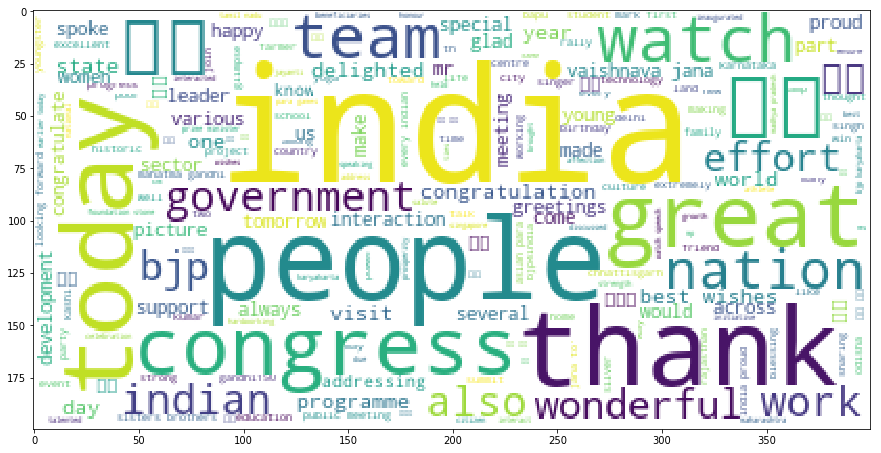

In [14]:
plt.figure(figsize=(15,8))
text=' '.join(df_tweets['text'].str.lower())
stopwords=nltk.corpus.stopwords.words('english')
stopwords.extend(['','https','co','rt','ji','shri'])
wc=WordCloud(background_color='white', stopwords=stopwords).generate(text)
plt.imshow(wc)
plt.show()

In [20]:
### Search tweets based on search term
df_tweets=pd.DataFrame()

tweets=api.search('#flipkart',count=1000)   
for tweet in tweets:
    curr_tweet={
    'text':tweet.text,
    'created_at':tweet.created_at,
    'retweets':tweet.retweet_count,
    'likes':tweet.favorite_count,
    'source':tweet.source,
    'geo':tweet.geo,
    'profile_location':tweet.user.location,
    'profile_name':tweet.user.name,
    'profile_description':tweet.user.description}
    df_tweets=df_tweets.append(curr_tweet,ignore_index=True)
    

In [21]:
df_tweets

,created_at,geo,likes,profile_description,profile_location,profile_name,retweets,source,text
0,2019-02-20 11:15:28,None,0.0,Android Developer,Rajkot,OneRaj,0.0,Twitter for Android,Oid- OD114750882106026000\n&amp;\nOId - OD1147...
1,2019-02-20 11:14:06,None,0.0,,India,Grabfly,0.0,Twitter Web Client,Vivo V15 Pro with 32MP Pop-up Selfie launched ...
2,2019-02-20 11:11:34,None,0.0,,,Shopperend,0.0,Twitter Web Client,Vivo V15 Pro with 32MP Pop-up Selfie launched ...
3,2019-02-20 10:44:06,None,0.0,Just a fun loving person 2 be known! Monday ha...,Chennai,Balamurukan,0.0,Twitter for iPhone,@flipkartsupport Mandate information? He asked...
4,2019-02-20 10:38:10,None,0.0,Forever eating and dancing | @qz @qzindia (ana...,"Mumbai, India",Ananya Bhattacharya,1.0,Twitter for iPhone,RT @ItikaSPunit: “In terms of the regulatory e...
5,2019-02-20 10:34:25,None,0.0,Chai Lover.,India,Khaja Moinuddin,14.0,Twitter for Android,RT @AmreliaRuhez: Xiaomi Redmi Note 7 teaser p...
6,2019-02-20 10:20:56,None,0.0,SUBSCRIBE OUR YOUTUBE CHANNEL FOR LATEST TECH ...,Hanumangarh,Shubham,14.0,Twitter Web App,RT @AmreliaRuhez: Xiaomi Redmi Note 7 teaser p...
7,2019-02-20 10:18:56,None,0.0,,,Vishal kumar,0.0,Twitter for Android,#Flipkart has stopped his #AffiliateMarketing ...
8,2019-02-20 10:16:38,None,0.0,,,praveen,0.0,Twitter for Android,@Kissht_EMI mera account #flipkart pe block k...
9,2019-02-20 10:12:34,None,0.0,"Wanna be HaCkeR, Linux geek, Indian by heart (...",India,♚Binod Sutar♚,0.0,Twitter for Android,@_Kalyan_K @Flipkart do yo cancel the approve ...


In [22]:
df_tweets.loc[74,'text']

'RT @GoNews24x7: Ola Invests In Carpooling Startup | Ola to invest in Pune-based carpooling firm sRide. Meanwhile, Flipkart co-founder, Sach…'

In [23]:
# Current Directory
import os
os.getcwd()

'C:\\Users\\lenovo\\PGPDSE\\9. Text Mining'

In [24]:
import glob
glob.glob('*.py')

['twitter_streaming_api.py']

# Web Scraping

In [25]:
!pip install selenium

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
mysql-connector-python 8.0.13 requires protobuf>=3.0.0, which is not installed.
You are using pip version 10.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
from selenium import webdriver
browser=webdriver.Chrome('chromedriver.exe')

In [27]:
browser.get('https://google.com')

In [28]:
url='https://en.wikipedia.org/wiki/Machine_learning'
browser.get(url)

In [29]:
ptags=browser.find_elements_by_css_selector('p')          # to select elements from webpage

In [30]:
len(ptags)

60

In [31]:
for tag in ptags:
    print(tag.text)
    print('---------')

Machine learning (ML) is the scientific study of algorithms and statistical models that computer systems use to effectively perform a specific task without using explicit instructions, relying on patterns and inference instead. It is seen as a subset of artificial intelligence. Machine learning algorithms build a mathematical model of sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.[1][2]:2 Machine learning algorithms are used in the applications of email filtering, detection of network intruders, and computer vision, where it is infeasible to develop an algorithm of specific instructions for performing the task. Machine learning is closely related to computational statistics, which focuses on making predictions using computers. The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a field of study within machine lea

Leo Breiman distinguished two statistical modelling paradigms: data model and algorithmic model,[14] wherein "algorithmic model" means more or less the machine learning algorithms like Random forest.
---------
Some statisticians have adopted methods from machine learning, leading to a combined field that they call statistical learning.[15]
---------
A core objective of a learner is to generalize from its experience.[2][16] Generalization in this context is the ability of a learning machine to perform accurately on new, unseen examples/tasks after having experienced a learning data set. The training examples come from some generally unknown probability distribution (considered representative of the space of occurrences) and the learner has to build a general model about this space that enables it to produce sufficiently accurate predictions in new cases.
---------
The computational analysis of machine learning algorithms and their performance is a branch of theoretical computer science 

Sparse dictionary learning is a feature learning method where a training example is represented as a linear combination of basis functions, and is assumed to be a sparse matrix. The method is strongly NP-hard and difficult to solve approximately.[32] A popular heuristic method for sparse dictionary learning is the K-SVD algorithm. Sparse dictionary learning has been applied in several contexts. In classification, the problem is to determine to which classes a previously unseen training example belongs. For a dictionary where each class has already been built, a new training example is associated with the class that is best sparsely represented by the corresponding dictionary. Sparse dictionary learning has also been applied in image de-noising. The key idea is that a clean image patch can be sparsely represented by an image dictionary, but the noise cannot.[33]
---------
In data mining, anomaly detection, also known as outlier detection, is the identification of rare items, events or o

A genetic algorithm (GA) is a search algorithm and heuristic technique that mimics the process of natural selection, using methods such as mutation and crossover to generate new genotypes in the hope of finding good solutions to a given problem. In machine learning, genetic algorithms were used in the 1980s and 1990s.[51][52] Conversely, machine learning techniques have been used to improve the performance of genetic and evolutionary algorithms.[53]
---------
Applications for machine learning include:
---------
In 2006, the online movie company Netflix held the first "Netflix Prize" competition to find a program to better predict user preferences and improve the accuracy on its existing Cinematch movie recommendation algorithm by at least 10%. A joint team made up of researchers from AT&T Labs-Research in collaboration with the teams Big Chaos and Pragmatic Theory built an ensemble model to win the Grand Prize in 2009 for $1 million.[54] Shortly after the prize was awarded, Netflix rea

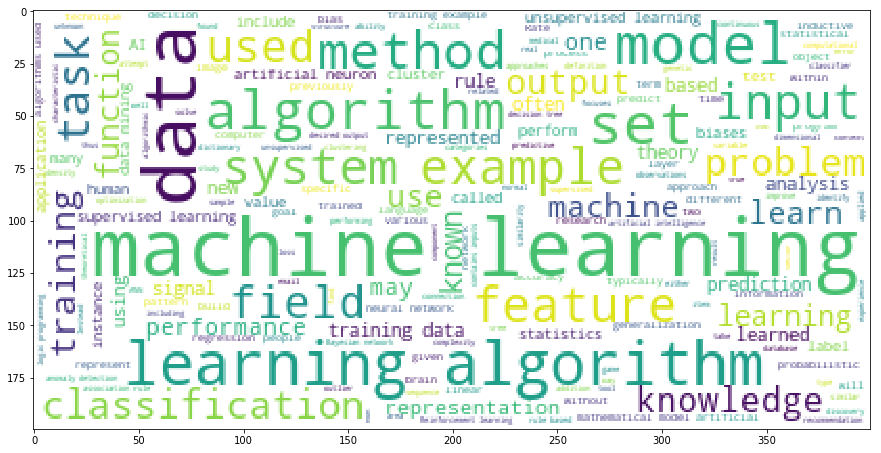

In [32]:
plt.figure(figsize=(15,8))
article=' '.join([para.text for para in ptags])
wc=WordCloud(background_color='white').generate(article)
plt.imshow(wc)
plt.show()

In [33]:
url='https://bit.ly/2twaRXz'
browser.get(url)

In [34]:
res_tags=browser.find_elements_by_css_selector('div.h100.pb20') #  div.h100.pb20 is from the html code of website

In [35]:
len(res_tags)

150

In [36]:
from selenium.common.exceptions import NoSuchElementException
restaurants=pd.DataFrame()
for res in res_tags:
    title = res.find_element_by_css_selector('div.res_title')
    title = title.get_attribute('title')
    loc=res.find_element_by_css_selector('div.nowrap.grey-text.fontsize5.ttupper')
    loc=loc.text
    types=res.find_element_by_css_selector('div.ptop0.pbot0.pl10.pr10') # parent div tag
    types=types.find_elements_by_css_selector('div')[2].text
    
    try:
        url=res.find_element_by_css_selector('a[data-link-type="restaurant"]')
        url=url.get_attribute('href')
    except NoSuchElementException:
        url=None
    curr_res={'title':title,'loc':loc,'food_type':types,'url':url}
    restaurants=restaurants.append(curr_res,ignore_index=True)
    


In [37]:
restaurants

,food_type,loc,title,url
0,"Continental, Asian, South Indian, North Indian","SHERATON GRAND BENGALURU, WHITEFIELD, BANGALORE",Feast - Sheraton Grand Bengaluru Whitefield Ho...,https://www.zomato.com/bangalore/feast-sherato...
1,"Continental, Finger Food, Asian, Chinese","HSR, BANGALORE",Baar Union,https://www.zomato.com/bangalore/baar-union-hs...
2,"Finger Food, North Indian, Continental","JP NAGAR, BANGALORE",Levitate Brewery and Kitchen,https://www.zomato.com/bangalore/levitate-brew...
3,"American, Continental, Pizza","KALYAN NAGAR, BANGALORE",Brewklyn Microbrewery,https://www.zomato.com/bangalore/brewklyn-micr...
4,"Salad, Italian, Desserts, Pizza","SARJAPUR ROAD, BANGALORE",Via Milano,https://www.zomato.com/bangalore/via-milano-sa...
5,"Continental, American, Italian, Modern Indian,...","KORAMANGALA 5TH BLOCK, BANGALORE",Simon Says Brew Works,https://www.zomato.com/bangalore/simon-says-br...
6,"North Indian, Continental","SOUL SPACE ARENA MALL, MARATHAHALLI, BANGALORE",Output Bengaluru,https://www.zomato.com/bangalore/output-bengal...
7,"Asian, Burmese","INDIRANAGAR, BANGALORE",Burma Burma,https://www.zomato.com/bangalore/burma-burma-i...
8,"American, Continental, North Indian, Mediterra...","OLD AIRPORT ROAD, BANGALORE",Big Pitcher,https://www.zomato.com/bangalore/big-pitcher-a...
9,"North Indian, South Indian, Chinese, Continent...","KORAMANGALA 1ST BLOCK, BANGALORE",Roots,https://www.zomato.com/bangalore/roots-koraman...


In [38]:
pd.isnull(restaurants['url']).sum()

29

In [45]:
reviews=pd.DataFrame()
for index,row in restaurants.iterrows():
    if not pd.isnull(row['url']):
        #print(row['url'])
        browser.get(row['url'])
        rev_tags=browser.find_elements_by_css_selector('div.ui.segment.clearfix.brtop')
        for rev in rev_tags:
            user=rev.find_element_by_css_selector('a[data-entity_id]').text
            try:
                rev_text=rev.find_element_by_css_selector('div.rev_text')
                text=rev_text.text
                rating=rev_text.find_element_by_css_selector('div').get_attribute('aira-label')
            except:
                rev_text=''
                rating=''
            curr_review={'user':user,'restaurant':row['title'],'rating':rating,'review_text':text}
            reviews=reviews.append(curr_review,ignore_index=True)
reviews            

,rating,restaurant,review_text,user
0,,Feast - Sheraton Grand Bengaluru Whitefield Ho...,addressing the media after talks with hrh moha...,Noyonika Goswami
1,,Feast - Sheraton Grand Bengaluru Whitefield Ho...,addressing the media after talks with hrh moha...,Priyanka Gupta
2,,Feast - Sheraton Grand Bengaluru Whitefield Ho...,addressing the media after talks with hrh moha...,Arup Giri
3,,Feast - Sheraton Grand Bengaluru Whitefield Ho...,addressing the media after talks with hrh moha...,Kashmira More
4,,Feast - Sheraton Grand Bengaluru Whitefield Ho...,addressing the media after talks with hrh moha...,Amit Goel
5,,Feast - Sheraton Grand Bengaluru Whitefield Ho...,addressing the media after talks with hrh moha...,MSM
6,,Feast - Sheraton Grand Bengaluru Whitefield Ho...,addressing the media after talks with hrh moha...,Mallesh BM
7,,Feast - Sheraton Grand Bengaluru Whitefield Ho...,addressing the media after talks with hrh moha...,Ruchika Banerjee
8,,Feast - Sheraton Grand Bengaluru Whitefield Ho...,addressing the media after talks with hrh moha...,Mili Sinha
9,,Baar Union,addressing the media after talks with hrh moha...,Shashi UH. @food.clickz
